In [3]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.datasets import make_classification
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=5, suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression()

In [7]:
r2_score(y, linear_regression.predict(X))

0.7406426641094095

In [10]:
residuals = y - linear_regression.predict(X)
print("Head of residual %s" % residuals[:5])
print("Mean of residuals: %0.3f" % np.mean(residuals))
print("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual [-6.00384 -3.42556  4.1324   4.79296  8.25648]
Mean of residuals: 0.000
Standard deviation of residuals: 4.679


Text(0, 0.5, 'partial residuals')

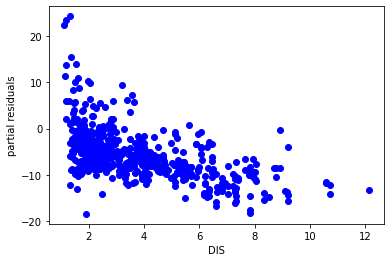

In [33]:
var = 7
partial_residual = residuals + X.iloc[:, var] * linear_regression.coef_[var]
plt.plot(X.iloc[:, var], partial_residual, 'bo')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')